# Xplainable methods Guide

In this notebook we present several Xplainable methods that are used in nowdays AI projects. Our aim is to get deeper understanding on these methods, therefore, we apply them on datasets that are publicly available such as: 

1. Dataset previously processed in the Sorbonne Data Challenge:

This dataset .. 

2. XXX from website:

Dataset description. 

### Libraries

In [5]:
### For Data treatment
import pandas as pd 
import numpy as np 
import pickle

### For Model training and Evaluation
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import classification_report, f1_score, make_scorer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.multiclass import OneVsRestClassifier

### For Visualisation
import matplotlib.pyplot as plt 
import plotly.express as px

### Dataset - Sorbonne Data Challenge

In [2]:
X_train = pd.read_csv('../dataset/x_train.csv', index_col= 0)
X_test = pd.read_csv('../dataset/x_test.csv', index_col= 0)

y_train = pd.read_csv('../dataset/y_train.csv', index_col= 0)
y_test = pd.read_csv('../dataset/y_test.csv', index_col= 0)

### Model - Trained and saved

In [6]:
filename = '../trained_model/hgb.pkl'
with open(filename, 'rb') as file:
    model = pickle.load(file)

### Explainable Methods

#### Shap

... **Introduction** & theoretical explications

C:\Users\miche\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\tqdm\auto.py:21: TqdmWarning:

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html

100%|===================| 18447/18481 [04:34<00:00]        

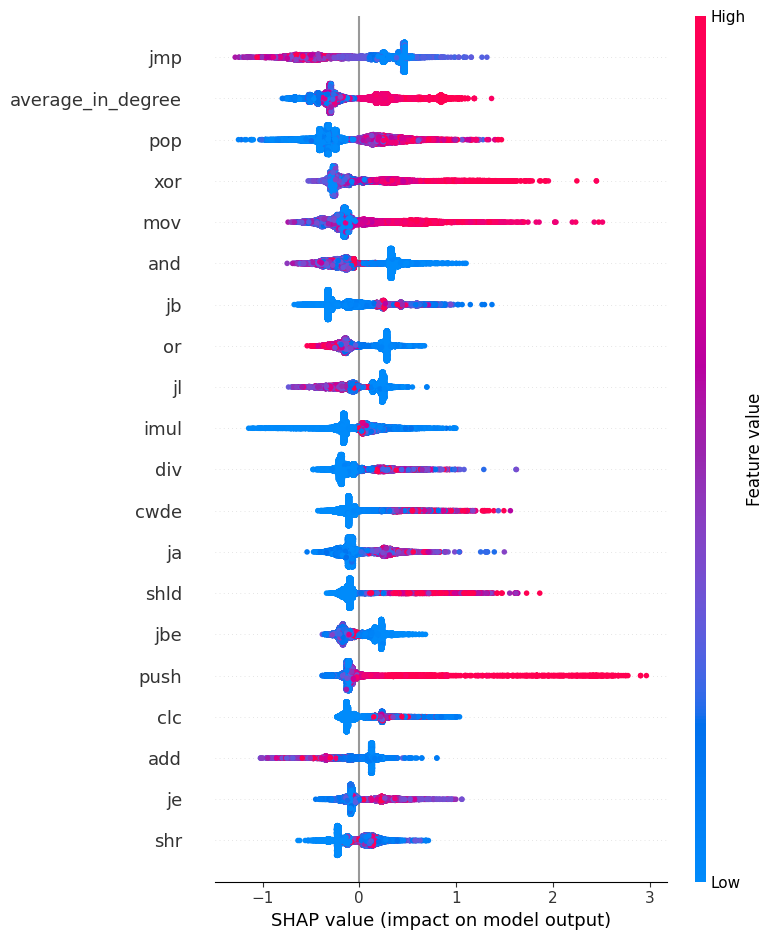

In [7]:
import shap

y_pred = model.predict(X_test)

first_label_classifier = model.estimators_[0]
sample_idx = 0
sample = X_train.iloc[sample_idx:sample_idx+1]

# Appliquer SHAP
explainer = shap.Explainer(first_label_classifier, X_train)
shap_values = explainer.shap_values(X_train, check_additivity=False)


#shap_values = explainer(X_train)

shap.summary_plot(shap_values, X_train)